# Summary

## Background

Need a way to compare machine learning metrics without using too many assumptions.

## Objective

Compare qCSI model to full model to simpler scoring systems

## Methods

### Bootstrap hypothesis testing

1. bootsrap n replicates wit resampling from data (same size)
2. for each bootstrap iteration, store the mean difference
3. welch's t-test on dist of means

In [1]:
%matplotlib inline

import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# qCSI vs. qSOFA

In [2]:
# IO
dfp = '/home/jovyan/work/ngr4/data/ed_data/final200427/final_4_27'
pdfp = '/home/jovyan/work/ngr4/data/processed/'
pfp = '/home/jovyan/work/ngr4/results/'

modelx = 'qCSI'
methodx = 'LR'
dfx = pd.read_csv(os.path.join(pdfp,'{}_{}optimized_bootstraps.csv'.format(modelx,methodx)))

modely = 'qSOFA'
methody = 'LR'
dfy = pd.read_csv(os.path.join(pdfp,'{}_{}optimized_bootstraps.csv'.format(modely,methody)))

Through 0.0-% bootstrap iters	in 0.00-s	~0.02-s remain
Through 10.0-% bootstrap iters	in 0.00-s	~0.26-s remain
Through 20.0-% bootstrap iters	in 0.01-s	~0.44-s remain
Through 30.0-% bootstrap iters	in 0.01-s	~0.57-s remain
Through 40.0-% bootstrap iters	in 0.01-s	~0.65-s remain
Through 50.0-% bootstrap iters	in 0.01-s	~0.67-s remain
Through 60.0-% bootstrap iters	in 0.02-s	~0.62-s remain
Through 70.0-% bootstrap iters	in 0.02-s	~0.52-s remain
Through 80.0-% bootstrap iters	in 0.02-s	~0.38-s remain
Through 90.0-% bootstrap iters	in 0.02-s	~0.21-s remain

Welchs t-test, qCSI - qSOFA
--------------------------
t: 298.19	p: 3.16e-27

Welchs t-test on ORIGINAL AU-ROC set, qCSI - qSOFA
--------------------------
t: 85.60	p: 0.00e+00


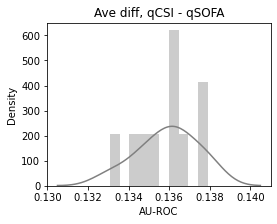

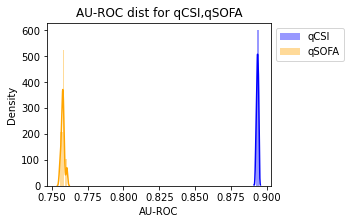

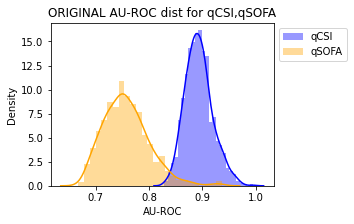

In [3]:
# ave_diff btw x,y
metric = 'au-roc'

# original difference for t-test
orig_diff = dfx.mean()[metric] - dfy.mean()[metric]

n_resamples = 10000
tic = time.time()
ave_diff = []
mean_x = []
mean_y = []
for n_iter in range(n_resamples):
    if n_iter % 1000 == 0:
        n_left = n_resamples - n_iter
        pthrough = 100*(n_iter)/n_resamples
        toc = time.time()
        print('Through {:.1f}-% bootstrap iters\tin {:.2f}-s\t~{:.2f}-s remain'.format(pthrough,toc-tic,(100-pthrough)*(toc-tic)))
        
        sample_ave_x = dfx.sample(n=dfx.shape[0], replace=True).mean()[metric]
        sample_ave_y = dfy.sample(n=dfy.shape[0], replace=True).mean()[metric]
        
        ave_diff.append(sample_ave_x - sample_ave_y)
        
        mean_x.append(sample_ave_x)
        mean_y.append(sample_ave_y)
        
print('\nWelchs t-test, {} - {}'.format(modelx,modely))
print('--------------------------')
t, p = stats.ttest_ind(mean_x, mean_y, equal_var=False)
print('t: {:.2f}\tp: {:.2e}'.format(t,p))

print('\nWelchs t-test on ORIGINAL {} set, {} - {}'.format(metric.upper(),modelx,modely))
print('--------------------------')
t, p = stats.ttest_ind(dfx[metric], dfy[metric], equal_var=False)
print('t: {:.2f}\tp: {:.2e}'.format(t,p))
        
# plot average difference 
fig,ax = plt.subplots(1,1,figsize=(4,3))
p = sns.distplot(ave_diff,bins=10, color='gray', ax=ax)
ax.set_xlabel(metric.upper())
ax.set_ylabel('Density')
ax.set_title('Ave diff, {} - {}'.format(modelx,modely))

# plot dist of metric
fig,ax = plt.subplots(1,1,figsize=(4,3))
p1 = sns.distplot(mean_x, color='blue', label=modelx, ax=ax)
p2 = sns.distplot(mean_y, color='orange', label=modely, ax=ax)
ax.set_title('{} dist for {},{}'.format(metric.upper(), modelx,modely))
ax.set_xlabel(metric.upper())
ax.set_ylabel('Density')
ax.legend(bbox_to_anchor=(1,1))

# plot dist of metric
fig,ax = plt.subplots(1,1,figsize=(4,3))
p1 = sns.distplot(dfx[metric], color='blue', label=modelx, ax=ax)
p2 = sns.distplot(dfy[metric], color='orange', label=modely, ax=ax)
ax.set_title('ORIGINAL {} dist for {},{}'.format(metric.upper(), modelx,modely))
ax.set_xlabel(metric.upper())
ax.set_ylabel('Density')
ax.legend(bbox_to_anchor=(1,1))


# CSI w/imp vs. qCSI

In [4]:
# IO
dfp = '/home/jovyan/work/ngr4/data/ed_data/final200427/final_4_27'
pdfp = '/home/jovyan/work/ngr4/data/processed/'
pfp = '/home/jovyan/work/ngr4/results/'

modelx = 'CSIbst'
methodx = 'XGB'
dfx = pd.read_csv(os.path.join(pdfp,'{}_{}optimized_bootstraps.csv'.format(modelx,methodx)))

modely = 'qCSI'
methody = 'LR'
dfy = pd.read_csv(os.path.join(pdfp,'{}_{}optimized_bootstraps.csv'.format(modely,methody)))

Through 0.0-% bootstrap iters	in 0.00-s	~0.03-s remain
Through 10.0-% bootstrap iters	in 0.00-s	~0.27-s remain
Through 20.0-% bootstrap iters	in 0.01-s	~0.43-s remain
Through 30.0-% bootstrap iters	in 0.01-s	~0.53-s remain
Through 40.0-% bootstrap iters	in 0.01-s	~0.59-s remain
Through 50.0-% bootstrap iters	in 0.01-s	~0.60-s remain
Through 60.0-% bootstrap iters	in 0.01-s	~0.57-s remain
Through 70.0-% bootstrap iters	in 0.02-s	~0.49-s remain
Through 80.0-% bootstrap iters	in 0.02-s	~0.37-s remain
Through 90.0-% bootstrap iters	in 0.02-s	~0.21-s remain

Welchs t-test, CSIbst - qCSI
--------------------------
t: 49.83	p: 2.14e-20

Welchs t-test on ORIGINAL AU-ROC set, CSIbst - qCSI
--------------------------
t: 11.63	p: 3.29e-30


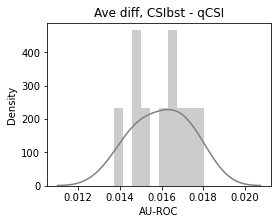

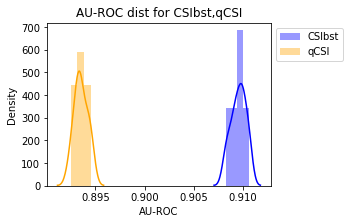

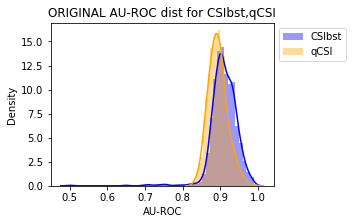

In [5]:
# ave_diff btw x,y
metric = 'au-roc'

# original difference for t-test
orig_diff = dfx.mean()[metric] - dfy.mean()[metric]

n_resamples = 10000
tic = time.time()
ave_diff = []
mean_x = []
mean_y = []
for n_iter in range(n_resamples):
    if n_iter % 1000 == 0:
        n_left = n_resamples - n_iter
        pthrough = 100*(n_iter)/n_resamples
        toc = time.time()
        print('Through {:.1f}-% bootstrap iters\tin {:.2f}-s\t~{:.2f}-s remain'.format(pthrough,toc-tic,(100-pthrough)*(toc-tic)))
        
        sample_ave_x = dfx.sample(n=dfx.shape[0], replace=True).mean()[metric]
        sample_ave_y = dfy.sample(n=dfy.shape[0], replace=True).mean()[metric]
        
        ave_diff.append(sample_ave_x - sample_ave_y)
        
        mean_x.append(sample_ave_x)
        mean_y.append(sample_ave_y)
        
print('\nWelchs t-test, {} - {}'.format(modelx,modely))
print('--------------------------')
t, p = stats.ttest_ind(mean_x, mean_y, equal_var=False)
print('t: {:.2f}\tp: {:.2e}'.format(t,p))

print('\nWelchs t-test on ORIGINAL {} set, {} - {}'.format(metric.upper(),modelx,modely))
print('--------------------------')
t, p = stats.ttest_ind(dfx[metric], dfy[metric], equal_var=False)
print('t: {:.2f}\tp: {:.2e}'.format(t,p))
        
# plot average difference 
fig,ax = plt.subplots(1,1,figsize=(4,3))
p = sns.distplot(ave_diff,bins=10, color='gray', ax=ax)
ax.set_xlabel(metric.upper())
ax.set_ylabel('Density')
ax.set_title('Ave diff, {} - {}'.format(modelx,modely))

# plot dist of metric
fig,ax = plt.subplots(1,1,figsize=(4,3))
p1 = sns.distplot(mean_x, color='blue', label=modelx, ax=ax)
p2 = sns.distplot(mean_y, color='orange', label=modely, ax=ax)
ax.set_title('{} dist for {},{}'.format(metric.upper(), modelx,modely))
ax.set_xlabel(metric.upper())
ax.set_ylabel('Density')
ax.legend(bbox_to_anchor=(1,1))

# plot dist of metric
fig,ax = plt.subplots(1,1,figsize=(4,3))
p1 = sns.distplot(dfx[metric], color='blue', label=modelx, ax=ax)
p2 = sns.distplot(dfy[metric], color='orange', label=modely, ax=ax)
ax.set_title('ORIGINAL {} dist for {},{}'.format(metric.upper(), modelx,modely))
ax.set_xlabel(metric.upper())
ax.set_ylabel('Density')
ax.legend(bbox_to_anchor=(1,1))
